In [1]:
# Ensembles of Estimators: Random Forests
# 可以組合多個過度擬合估計器以減少過度擬合對 forest的影響 ，在SKlearn中的BaggingClassifier利用平行估計器的集合，將每個估計器都過度擬合數據，對數據求平均值以找到更好的分類。

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
# 建立visualize_classifier函數，快速平面上的資料切割
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# 首先，建立二維，四個資料標籤的資料集合
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, n_features=10,
                  random_state=0, cluster_std=1.0)
tree = DecisionTreeClassifier()

In [52]:
#通過每個估計器擬合80％的訓練點
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

model = bag.fit(X, y)
test_y_predicted = model.predict(X)
from sklearn import metrics
accuracy = metrics.accuracy_score(y, test_y_predicted)
print(accuracy)
# visualize_classifier(bag, X, y)

1.0


In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y)
test_y_predicted = model.predict(X)
from sklearn import metrics
accuracy = metrics.accuracy_score(y, test_y_predicted)
print(accuracy)
# visualize_classifier(model, X, y)

1.0


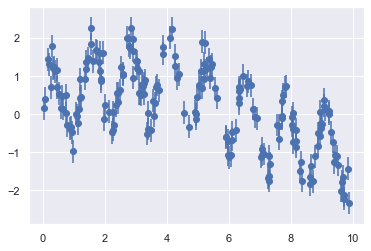

In [71]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise
# y = 有雜訊的 sin(x)
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

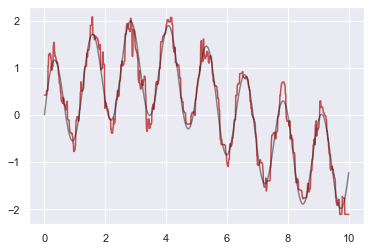

In [72]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
# 用 x 擬合 y 透過 randomforest 建模
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
# ytrue 無雜訊正確值
ytrue = model(xfit, sigma=0)

# plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
# 從雜訊資料中萃取出正確波型
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

In [11]:
# 以sklearn中的手寫數字集合來舉例

In [73]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

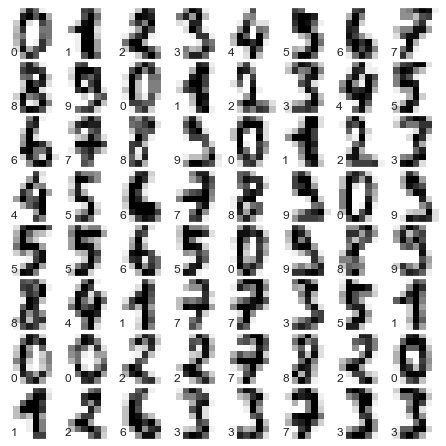

In [77]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches (每張圖大小))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    # 8x8 第 i+1 個位置
    tx = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    tx.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    # 文字位置
    tx.text(0, 7, str(digits.target[i]))

In [89]:
# 將手寫資料分test、train資料，並利用上面介紹RandomForestClassifier()的方法將手寫數字進行分類。
from sklearn.model_selection import train_test_split
from sklearn import metrics
# random_state 是為了確保程序每次運行都分割一樣的訓練集和測試集
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
# Xtrain[0]                
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.98      1.00      0.99        43
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(80.90000000000006, 0.5, 'predicted label')

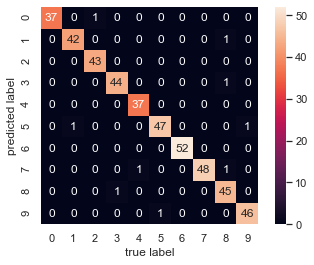

In [91]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')